In [1]:
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, Subset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid
from src.train import train_tensorVAE, train_VAE
from src.plot import *

In [2]:
from src.loss import vae_loss
from src.models import VAE_CNN
import numpy as np

In [3]:
from src.data import image_data_loader

# MNIST VAE and tensorVAE training

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
batch_size = 50
class_labels_list = [0,1,9]
num_samples = 200
data_path = './data'
train_loader, test_loader = image_data_loader(dataset="mnist", path = data_path, batch_size = batch_size, class_labels_list = class_labels_list, num_samples = num_samples)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


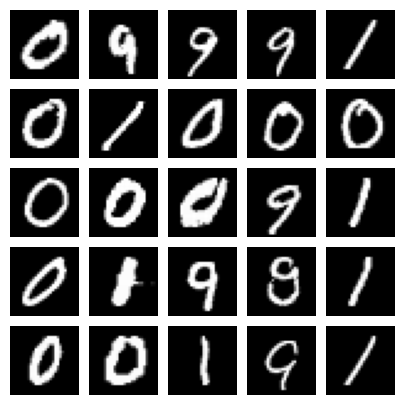

In [6]:
plot_training_images(train_loader)

## Train tensorVAE
models are saved in ./models/tvae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}

In [ ]:
# tensorVAE training hyperparameters
lr = 1e-3
epochs = 200 
reg = [0.1,0.2,0.3,0.4,0.5]
mse = False
linear_output = False
n_clusters = 3

In [7]:
for r in reg:
    print("reg ", r)
    model, train_loss, clust_assign = train_tensorVAE(train_loader, lr=lr, epochs=epochs, n_clusters=n_clusters, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, device=device)
    fname = f'./models/tvae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.2
epoch 0 loss 541.2976080322265
epoch 50 loss 540.0455348714192
epoch 100 loss 539.7820241292318
epoch 150 loss 539.5651856486003
reg  0.3
epoch 0 loss 541.751928914388
epoch 50 loss 540.1450010172526
epoch 100 loss 539.7556003824869
epoch 150 loss 539.5301453653972
reg  0.4
epoch 0 loss 541.4126632690429
epoch 50 loss 540.4753911336263
epoch 100 loss 540.101478881836
epoch 150 loss 539.7919823201497


In [5]:
# tensorVAE training hyperparameters
lr = 1e-3
epochs = 200 
reg = [0.1,0.2,0.3,0.4,0.5]
mse = True
linear_output = True
n_clusters = 3

In [6]:
for r in reg:
    print("reg ", r)
    model, train_loss, clust_assign = train_tensorVAE(train_loader, lr=lr, epochs=epochs, n_clusters=n_clusters, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, device="cpu")
    fname = f'./models/tvae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
epoch 0 loss 0.04958960799500346
epoch 50 loss 0.02778217599339162
epoch 100 loss 0.025109332775852332
epoch 150 loss 0.023502190307869264
reg  0.2
epoch 0 loss 0.050149958149219555
epoch 50 loss 0.029026864300637195
epoch 100 loss 0.025886990177289893
epoch 150 loss 0.02462264911388047
reg  0.3
epoch 0 loss 0.05044483665376902
epoch 50 loss 0.030417242793676753
epoch 100 loss 0.026621990563192716
epoch 150 loss 0.025055455286055805
reg  0.4
epoch 0 loss 0.05077356218360365
epoch 50 loss 0.031526793014102925
epoch 100 loss 0.027320022852315256
epoch 150 loss 0.02555726790955911
reg  0.5
epoch 0 loss 0.050540252874294915
epoch 50 loss 0.03156196395944183
epoch 100 loss 0.028091109361654768
epoch 150 loss 0.02637959293322638


## Train VAE
models saved in ./models/vae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}

In [5]:
lr = 1e-3
epochs = 200 
reg = [0.1,0.2,0.3,0.4,0.5]
mse = False
linear_output = False

for r in reg:
    print("reg ", r)
    model, train_loss = train_VAE(train_loader, lr=lr, epochs=epochs, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, device=device)
    fname = f'./models/vae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
	Epoch 1 	Average Loss:  418.52510298295454
	Epoch 51 	Average Loss:  120.13135120738636
	Epoch 101 	Average Loss:  112.44831587357955
	Epoch 151 	Average Loss:  108.77283469460227
reg  0.2
	Epoch 1 	Average Loss:  424.19802379261364
	Epoch 51 	Average Loss:  120.33970348011364
	Epoch 101 	Average Loss:  114.39424183238637
	Epoch 151 	Average Loss:  110.59237837357955
reg  0.3
	Epoch 1 	Average Loss:  430.1042294034091
	Epoch 51 	Average Loss:  121.44357776988636
	Epoch 101 	Average Loss:  113.80509321732954
	Epoch 151 	Average Loss:  109.42464222301136
reg  0.4
	Epoch 1 	Average Loss:  420.68452769886363
	Epoch 51 	Average Loss:  120.29781072443181
	Epoch 101 	Average Loss:  113.89347922585227
	Epoch 151 	Average Loss:  109.60394620028408
reg  0.5
	Epoch 1 	Average Loss:  436.42848899147725
	Epoch 51 	Average Loss:  119.07343661221591
	Epoch 101 	Average Loss:  114.21896040482955
	Epoch 151 	Average Loss:  110.49457386363636


In [5]:
lr = 1e-3
epochs = 200 
reg = [0.1,0.2,0.3,0.4,0.5]
mse = True
linear_output = True

for r in reg:
    print("reg ", r)
    model, train_loss = train_VAE(train_loader, lr=lr, epochs=epochs, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, device="cpu")
    fname = f'./models/vae_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
	Epoch 1 	Average Loss:  0.002841846793889999
	Epoch 51 	Average Loss:  0.0010232544013045052
	Epoch 101 	Average Loss:  0.0008585978773507205
	Epoch 151 	Average Loss:  0.0007926712117411874
reg  0.2
	Epoch 1 	Average Loss:  0.003480937724763697
	Epoch 51 	Average Loss:  0.0011436919800259851
	Epoch 101 	Average Loss:  0.001022793400016698
	Epoch 151 	Average Loss:  0.0008522151410579682
reg  0.3
	Epoch 1 	Average Loss:  0.004400969987565821
	Epoch 51 	Average Loss:  0.0014202470671046863
	Epoch 101 	Average Loss:  0.0010103613883256912
	Epoch 151 	Average Loss:  0.0008840160478245129
reg  0.4
	Epoch 1 	Average Loss:  0.006053284569220109
	Epoch 51 	Average Loss:  0.001158925931562077
	Epoch 101 	Average Loss:  0.0010128448497165334
	Epoch 151 	Average Loss:  0.0008842482756484638
reg  0.5
	Epoch 1 	Average Loss:  0.006125943294980309
	Epoch 51 	Average Loss:  0.0014211103997447273
	Epoch 101 	Average Loss:  0.0010385000841184096
	Epoch 151 	Average Loss:  0.00096489069136706

# Fashion MNIST, conv VAE

In [5]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose(
    [transforms.Pad(padding=2), transforms.ToTensor()]
)
batch_size = 50
class_labels_list = [0,1,9]
num_samples = 200
data_path = './data'
train_loader, test_loader = image_data_loader(dataset="fmnist", path = data_path, batch_size = batch_size, 
                                              class_labels_list = class_labels_list, num_samples = num_samples,
                                             transform=transform)

Number of total train and test samples  torch.Size([600]) torch.Size([300])


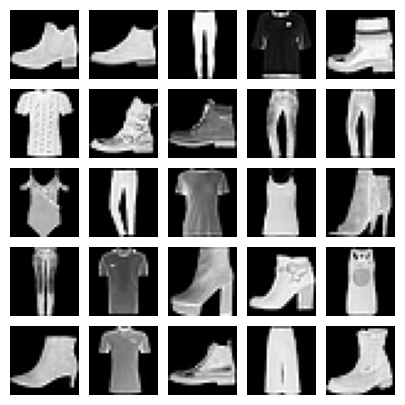

In [6]:
plot_training_images(train_loader)

## Train VAE CNN

In [8]:
lr = 1e-3
epochs = 200
reg = [0.1,0.2,0.3,0.4,0.5]
mse = False
linear_output = False

for r in reg:
    print("reg ", r)
    model, train_loss = train_VAE(train_loader, lr=lr, epochs=epochs, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, cnn_vae=True, device=device)
    fname = f'./models/vae_cnn_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
	Epoch 1 	Average Loss:  650.5249041193182
	Epoch 51 	Average Loss:  252.50219105113635
	Epoch 101 	Average Loss:  247.5202627840909
	Epoch 151 	Average Loss:  245.1009268465909
reg  0.2
	Epoch 1 	Average Loss:  736.5537535511363
	Epoch 51 	Average Loss:  254.60359730113638
	Epoch 101 	Average Loss:  249.51290305397728
	Epoch 151 	Average Loss:  246.68153053977272
reg  0.3
	Epoch 1 	Average Loss:  780.6020774147727
	Epoch 51 	Average Loss:  255.01305397727273
	Epoch 101 	Average Loss:  249.4426935369318
	Epoch 151 	Average Loss:  247.29998579545455
reg  0.4
	Epoch 1 	Average Loss:  779.9162855113636
	Epoch 51 	Average Loss:  254.40681818181818
	Epoch 101 	Average Loss:  249.64688210227274
	Epoch 151 	Average Loss:  246.91662109375
reg  0.5
	Epoch 1 	Average Loss:  710.7274467329545
	Epoch 51 	Average Loss:  255.18424715909092
	Epoch 101 	Average Loss:  249.94053977272728
	Epoch 151 	Average Loss:  247.52796875


In [6]:
lr = 1e-3
epochs = 200
reg = [0.1,0.2,0.3,0.4,0.5]
mse = True
linear_output = True

for r in reg:
    print("reg ", r)
    model, train_loss = train_VAE(train_loader, lr=lr, epochs=epochs, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, cnn_vae=True, device=device)
    fname = f'./models/vae_cnn_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
	Epoch 1 	Average Loss:  0.00540284896438772
	Epoch 51 	Average Loss:  0.0007425011558966203
	Epoch 101 	Average Loss:  0.0006073334406722676
	Epoch 151 	Average Loss:  0.0005555692890828306
reg  0.2
	Epoch 1 	Average Loss:  0.0038929875059561295
	Epoch 51 	Average Loss:  0.0013502183014696295
	Epoch 101 	Average Loss:  0.0007526517930355939
	Epoch 151 	Average Loss:  0.000607973923060027
reg  0.3
	Epoch 1 	Average Loss:  0.002743683525107124
	Epoch 51 	Average Loss:  0.0013432276926257393
	Epoch 101 	Average Loss:  0.0007188922234556891
	Epoch 151 	Average Loss:  0.0005888350409540263
reg  0.4
	Epoch 1 	Average Loss:  0.002565110989592292
	Epoch 51 	Average Loss:  0.0013436399535699324
	Epoch 101 	Average Loss:  0.0013446014645424756
	Epoch 151 	Average Loss:  0.0006793361699039286
reg  0.5
	Epoch 1 	Average Loss:  0.0028858312422578984
	Epoch 51 	Average Loss:  0.0013440058922225778
	Epoch 101 	Average Loss:  0.0013459300791675395
	Epoch 151 	Average Loss:  0.000724351873452

## Train tensorVAE CNN

In [8]:
lr = 1e-3
epochs = 200
reg = [0.1,0.2,0.3,0.4,0.5]
mse = False
linear_output = False
n_clusters= 3

for r in reg:
    print("reg ", r)
    model, train_loss, clust_assign = train_tensorVAE(train_loader, lr=lr, epochs=epochs, n_clusters=n_clusters, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, cnn_vae=True, device=device)
    fname = f'./models/tvae_cnn_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
epoch 0 loss 709.2039738972982
epoch 50 loss 704.0561662801107
epoch 100 loss 704.134925028483
epoch 150 loss 704.2243583170573
reg  0.2
epoch 0 loss 710.528985188802
epoch 50 loss 704.0695037841797
epoch 100 loss 704.1531121826172
epoch 150 loss 703.9084668986003
reg  0.3
epoch 0 loss 709.7833259073893
epoch 50 loss 704.3271006266276
epoch 100 loss 703.899106648763
epoch 150 loss 704.0051024373372
reg  0.4
epoch 0 loss 708.1517999267578
epoch 50 loss 704.0113861083985
epoch 100 loss 703.9381599934895
epoch 150 loss 704.0860608927409
reg  0.5
epoch 0 loss 711.1402716064454
epoch 50 loss 702.9039167277018
epoch 100 loss 704.3059070841472
epoch 150 loss 704.2264809163412


In [4]:
lr = 1e-3
epochs = 200
reg = [0.1,0.2,0.3,0.4,0.5]
mse = True
linear_output = True
n_clusters= 3

for r in reg:
    print("reg ", r)
    model, train_loss, clust_assign = train_tensorVAE(train_loader, lr=lr, epochs=epochs, n_clusters=n_clusters, batch_size=batch_size, reg=r, 
                                                      linear_output=linear_output, mse=mse, 
                                                      print_every=50, cnn_vae=True, device=device)
    fname = f'./models/tvae_cnn_lr{lr}_ep{epochs}_reg{r}_mse{mse}_lout{linear_output}'
    torch.save(model.state_dict(), fname)

reg  0.1
epoch 0 loss 0.03551446167752147
epoch 50 loss 0.018770395828566204
epoch 100 loss 0.017741051337992152
epoch 150 loss 0.01686641909337292
reg  0.2
epoch 0 loss 0.03708920606256773
epoch 50 loss 0.020122459013170252
epoch 100 loss 0.018140957858413458
epoch 150 loss 0.017401686367423584
reg  0.3
epoch 0 loss 0.06021035791995625
epoch 50 loss 0.020993578241517145
epoch 100 loss 0.018735604983909675
epoch 150 loss 0.018079289880115538
reg  0.4
epoch 0 loss 0.06810855745027462
epoch 50 loss 0.02022955913329497
epoch 100 loss 0.01786173486849293
epoch 150 loss 0.017052629386695724
reg  0.5
epoch 0 loss 0.07511291573755444
epoch 50 loss 0.021356432508522025
epoch 100 loss 0.01850356220267713
epoch 150 loss 0.017530662439142666


# Plots

## reconstruction

In [8]:
model = load_vae_model(lr = 1e-3, epochs = 200, reg = 0.1, 
         mse = False, linear_output = False, n_clusters = 3,
        vae="tvae_cnn", cnn_vae=True, digit_size=32, device=device) 

In [9]:
original, reconstruction, true_label, pred_label = get_reconstruction(model, train_loader, n_clusters=3, reg=0.1, mse=False, device=device)

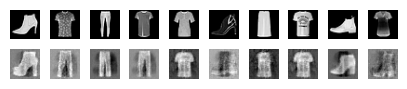

In [12]:
plot_reconstruction_vae(original, reconstruction, img_n=10, image_size=32, device=device)

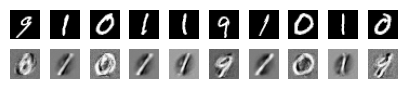

In [13]:
model = load_vae_model(lr = 1e-3, epochs = 200, reg = 0.2, 
         mse = False, linear_output = False, n_clusters = 3,
        vae="tvae", cnn_vae=False, digit_size=28, device=device) 
original, reconstruction, true_label, pred_label = get_reconstruction(model, train_loader, n_clusters=3, reg=0.2, mse=False, device=device)
plot_reconstruction_vae(original, reconstruction, img_n=10, image_size=28, device=device)

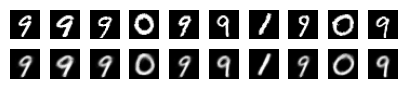

In [11]:
model = load_vae_model(lr = 1e-3, epochs = 200, reg = 0.2, 
         mse = False, linear_output = False, n_clusters = None,
        vae="vae", cnn_vae=False, digit_size=28, device=device) 
original, reconstruction, true_label, pred_label = get_reconstruction(model, train_loader, n_clusters=None, reg=0.1, mse=False, device=device)
plot_reconstruction_vae(original, reconstruction, img_n=10, image_size=28, device=device)

In [16]:
def plot_representation(model, loader, n_clusters=3):
    model.eval()
    representation = []
    true_label = []
    pred_label = []
    for batch_idx, (x, y) in enumerate(loader):
        x = x.reshape(batch_size, -1)
        x = x.to(device) #x.view(batch_size, x_dim).to(device)
        for i in range(batch_size):
            loss = torch.inf
            rep = None
            pred = -1
            for j in range(n_clusters):
                x_hat, mean, log_var = model(x[i], j)
                l = vae_loss(x[i], x_hat, mean, log_var)
                if loss>l:
                    loss = l
                    rep = mean
                    pred = j
            representation.append(rep.detach().cpu().tolist())
            true_label.append(y[i].item())
            pred_label.append(pred)
    print(len(representation))
    print("true label ", true_label)
    print("pred label ", pred_label)
    representation = np.array(representation)
    representation = representation.reshape(-1, 2)
    true_label = np.array(true_label)
    true_label = true_label.reshape(-1)
    for g in np.unique(true_label):
        i = np.where(true_label == g)
        plt.scatter(representation[i,0],representation[i,1], label=g)
    plt.legend()

600
true label  [9, 0, 1, 9, 0, 9, 9, 0, 0, 0, 9, 9, 9, 0, 9, 9, 1, 0, 9, 1, 9, 1, 1, 0, 9, 9, 0, 0, 0, 1, 9, 1, 0, 0, 0, 1, 1, 1, 9, 1, 9, 0, 0, 0, 9, 1, 9, 1, 9, 0, 9, 9, 0, 1, 9, 1, 0, 9, 0, 1, 1, 9, 9, 9, 0, 0, 1, 9, 1, 1, 1, 1, 9, 0, 0, 9, 0, 9, 1, 1, 9, 1, 9, 9, 9, 9, 9, 1, 0, 1, 1, 9, 9, 1, 1, 0, 1, 0, 9, 0, 0, 0, 0, 0, 0, 1, 1, 1, 9, 9, 1, 9, 1, 1, 1, 1, 1, 0, 9, 9, 1, 0, 0, 9, 1, 1, 9, 0, 0, 1, 9, 9, 9, 1, 9, 0, 0, 1, 0, 0, 9, 9, 1, 0, 9, 1, 1, 9, 9, 0, 0, 0, 9, 0, 9, 0, 0, 9, 1, 9, 0, 9, 1, 0, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 1, 1, 1, 1, 1, 1, 1, 9, 0, 1, 1, 0, 0, 1, 9, 1, 9, 1, 0, 0, 9, 1, 9, 1, 1, 0, 0, 1, 9, 1, 9, 1, 0, 9, 1, 1, 0, 9, 9, 9, 0, 0, 0, 0, 9, 9, 9, 0, 1, 1, 1, 9, 9, 0, 0, 9, 1, 9, 0, 1, 9, 1, 1, 1, 1, 1, 0, 9, 9, 0, 9, 1, 9, 9, 9, 0, 1, 1, 1, 9, 9, 1, 0, 0, 0, 9, 1, 0, 1, 1, 9, 9, 9, 9, 0, 1, 0, 1, 9, 9, 9, 9, 0, 9, 0, 9, 1, 9, 0, 0, 1, 1, 0, 9, 1, 9, 0, 0, 1, 0, 0, 0, 9, 1, 9, 1, 0, 9, 0, 9, 9, 1, 9, 1, 1, 1, 9, 9, 1, 9, 1, 0, 1, 0, 9, 1, 1, 9, 1, 1, 0, 9,

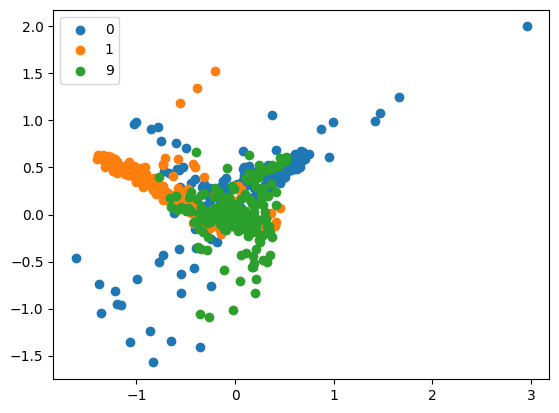

In [17]:
plot_representation(model, train_loader, n_clusters=3)

300
true label  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
pred label  [0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0

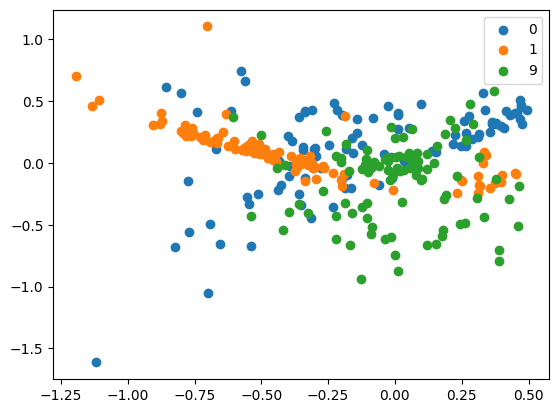

In [18]:
plot_representation(model, test_loader, n_clusters=3)

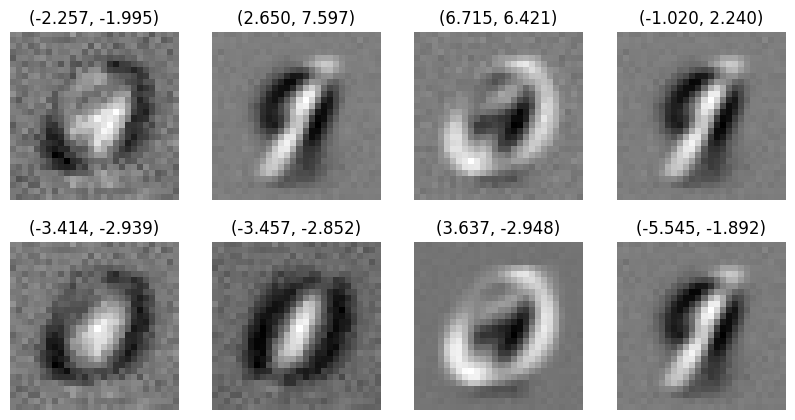

In [16]:
import random
# randomly sample x and y values
xs = [random.uniform(-6.0, 8.0) for i in range(8)]
ys = [random.uniform(-7.5, 10.0) for i in range(8)]

points = list(zip(xs, ys))
coords = torch.tensor(points).unsqueeze(1).to(device)

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))

model.eval()
with torch.no_grad():
    generates = [model.decode(coord) for coord in coords]
    
# plot points
idx = 0
for row in range(0, nrows):
    for col in range(0, ncols):
        ax = axes[row, col]
        im = generates[idx].squeeze().detach().cpu()
        ax.imshow(im.reshape(28,28), cmap="gray")
        ax.axis("off")
        coord = coords[idx].detach().cpu().numpy()[0]
        ax.set_title(f"({coord[0]:.3f}, {coord[1]:.3f})")
        idx += 1

plt.show()

In [31]:
model.eval()
representation_0 = []
representation_1 = []
representation_2 = []
true_label = []
# pred_label = []
for batch_idx, (x, y) in enumerate(test_loader):
    x = x.reshape(batch_size, -1)
    x = x.to(device) #x.view(batch_size, x_dim).to(device)
    for i in range(batch_size):
#         loss = torch.inf
#         rep = None
#         pred = -1
        for j in range(n_clusters):
            x_hat, mean, log_var = model(x[i], j)
#             l = loss_function(x[i], x_hat, mean, log_var)
#             if loss>l:
#                 loss = l
#                 rep = mean
#                 pred = j
            if j == 0:
                representation_0.append(mean.detach().cpu().tolist())
            elif j == 1:
                representation_1.append(mean.detach().cpu().tolist())
            elif j == 2:
                representation_2.append(mean.detach().cpu().tolist())
        true_label.append(y[i].item())
#         pred_label.append(pred)

print(len(representation_1))
print("true label ", true_label)
# print("pred label ", pred_label)


300
true label  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


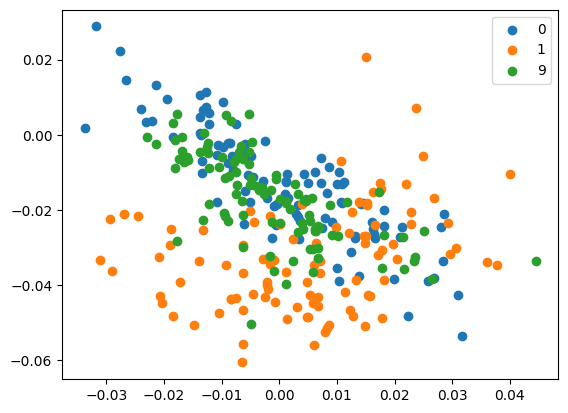

In [32]:
representation = np.array(representation_0)
representation = representation.reshape(-1, 2)
true_label = np.array(true_label)
true_label = true_label.reshape(-1)
for g in np.unique(true_label):
    i = np.where(true_label == g)
    plt.scatter(representation[i,0],representation[i,1], label=g)
plt.legend()

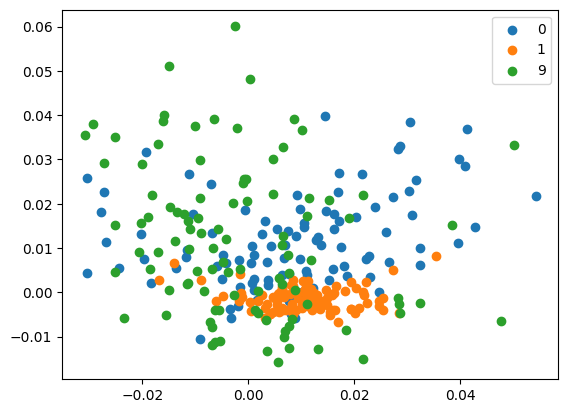

In [33]:
representation = np.array(representation_1)
representation = representation.reshape(-1, 2)
true_label = np.array(true_label)
true_label = true_label.reshape(-1)
for g in np.unique(true_label):
    i = np.where(true_label == g)
    plt.scatter(representation[i,0],representation[i,1], label=g)
plt.legend()

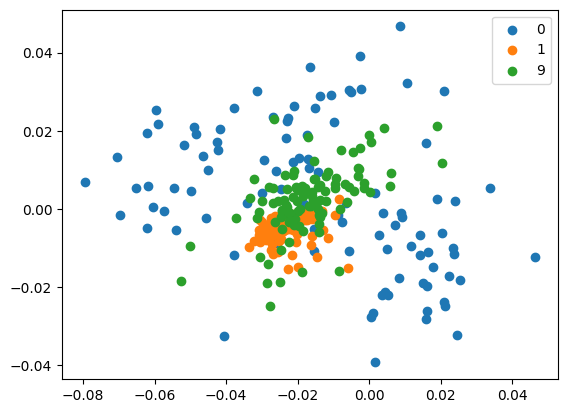

In [34]:
representation = np.array(representation_2)
representation = representation.reshape(-1, 2)
true_label = np.array(true_label)
true_label = true_label.reshape(-1)
for g in np.unique(true_label):
    i = np.where(true_label == g)
    plt.scatter(representation[i,0],representation[i,1], label=g)
plt.legend()

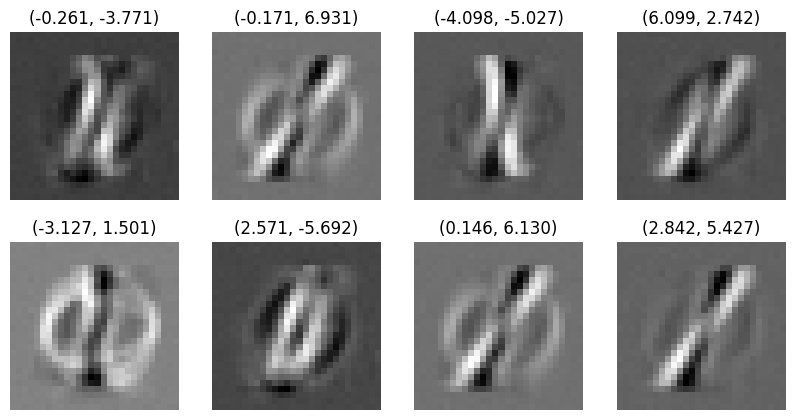

In [35]:
import random
# randomly sample x and y values
xs = [random.uniform(-6.0, 8.0) for i in range(8)]
ys = [random.uniform(-7.5, 10.0) for i in range(8)]

points = list(zip(xs, ys))
coords = torch.tensor(points).unsqueeze(1).to(device)

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))

model.eval()
with torch.no_grad():
    generates = [model.decode(coord,0) for coord in coords]
    
# plot points
idx = 0
for row in range(0, nrows):
    for col in range(0, ncols):
        ax = axes[row, col]
        im = generates[idx].squeeze().detach().cpu()
        ax.imshow(im.reshape(28,28), cmap="gray")
        ax.axis("off")
        coord = coords[idx].detach().cpu().numpy()[0]
        ax.set_title(f"({coord[0]:.3f}, {coord[1]:.3f})")
        idx += 1

plt.show()

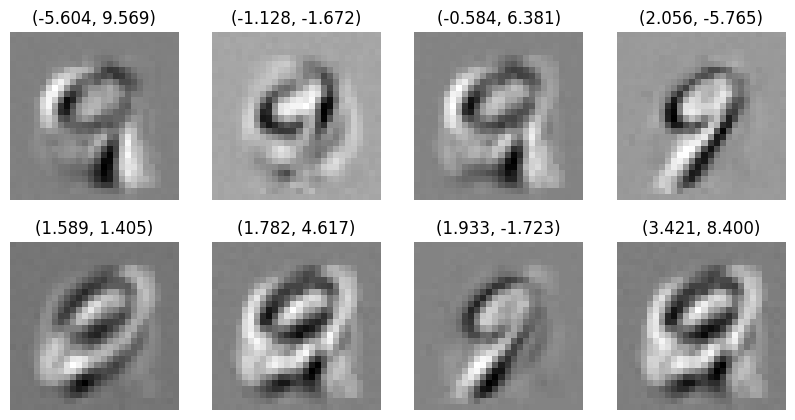

In [36]:
import random
# randomly sample x and y values
xs = [random.uniform(-6.0, 8.0) for i in range(8)]
ys = [random.uniform(-7.5, 10.0) for i in range(8)]

points = list(zip(xs, ys))
coords = torch.tensor(points).unsqueeze(1).to(device)

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))

model.eval()
with torch.no_grad():
    generates = [model.decode(coord,1) for coord in coords]
    
# plot points
idx = 0
for row in range(0, nrows):
    for col in range(0, ncols):
        ax = axes[row, col]
        im = generates[idx].squeeze().detach().cpu()
        ax.imshow(im.reshape(28,28), cmap="gray")
        ax.axis("off")
        coord = coords[idx].detach().cpu().numpy()[0]
        ax.set_title(f"({coord[0]:.3f}, {coord[1]:.3f})")
        idx += 1

plt.show()

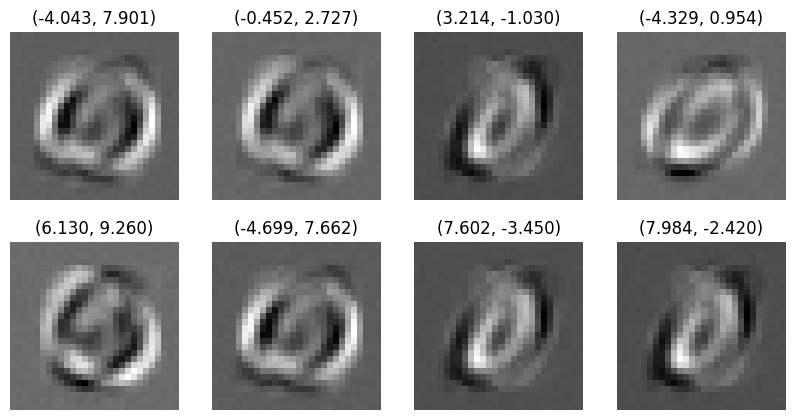

In [37]:
import random
# randomly sample x and y values
xs = [random.uniform(-6.0, 8.0) for i in range(8)]
ys = [random.uniform(-7.5, 10.0) for i in range(8)]

points = list(zip(xs, ys))
coords = torch.tensor(points).unsqueeze(1).to(device)

nrows, ncols = 2, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5))

model.eval()
with torch.no_grad():
    generates = [model.decode(coord,2) for coord in coords]
    
# plot points
idx = 0
for row in range(0, nrows):
    for col in range(0, ncols):
        ax = axes[row, col]
        im = generates[idx].squeeze().detach().cpu()
        ax.imshow(im.reshape(28,28), cmap="gray")
        ax.axis("off")
        coord = coords[idx].detach().cpu().numpy()[0]
        ax.set_title(f"({coord[0]:.3f}, {coord[1]:.3f})")
        idx += 1

plt.show()